<a href="https://colab.research.google.com/github/daviethedeveloper/TensorFlowNotes/blob/main/08_NLP_With_Tensor_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP



In [1]:
import datetime

print(f'Notebook last run: (end to end): {datetime.datetime.now()}')

Notebook last run: (end to end): 2023-07-18 21:55:12.961459


In [2]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-872994b6-1178-d446-d781-1aad0f8c3f4c)


## Get Helper Functions

In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-18 21:55:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-18 21:55:17 (80.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Functions
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [5]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2023-07-18 21:55:41--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-07-18 21:55:41 (114 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [6]:
# Unzip the data
unzip_data("nlp_getting_started.zip")

## Visualizing the Data

In [7]:
# Convert the csv files to Pandas DataFrame
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


**Note**: Shuffle The Training Data

In [8]:
# Shuffle training data
train_df_shuffle = train_df.sample(frac=1, random_state=42) # shuffle random state `42` for reproducibility
train_df_shuffle.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


**Note**: The train dataset has a `target` value, I will be writing code to predict the target value for 1&0.
The test dataset doesnt have a  `target` value.

In [9]:
# Check the test dataset
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


**Note** There is no target value here 1 or 0

In [10]:
# Check how many counts of each target value
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

**Note**
>There are 4342 0 class

>There are 3271 1 class

>This is a `binary classification` model

* 1 = a real disaster Tweet
* 0 = not a real disaster Tweet

In [11]:
# Check for the total number of classes
print(f'Total training samples: {len(train_df_shuffle)}')
print(f"Total test samples: {len(test_df)}")
print(f"Total of all samples: {len(test_df) + len(train_df_shuffle)}")

Total training samples: 7613
Total test samples: 3263
Total of all samples: 10876


In [12]:
# Visualize some random tweets
import random
random_index = random.randint(0, len(train_df)-5) # not larger than the data working with
for row in train_df_shuffle[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', "(real disaster)" if target > 0 else "(non real disaster)")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0 (non real disaster)
Text:
Got in a car wreck. The car in front of me didn't put their blinker on :-))) but it really does feel great outside so lol

----

Target: 0 (non real disaster)
Text:
@KaiSeiw And then there's people like me where my whole people are named Desolation

----

Target: 0 (non real disaster)
Text:
Lily Xo is a sexy cowgirl out in the sticks http://t.co/qew4c5M1xd View and download video

----

Target: 1 (real disaster)
Text:
Removing tsunami debris from the West Coast: Karen Robinson Enviromental and Emergency services manager of theÛ_ http://t.co/1MeEo3WJcO

----

Target: 0 (non real disaster)
Text:
My sis can now sit on a cam w/o panicking https://t.co/GiYaaD7dcc

----



## Split data into training and test sets

* We'll convert our splits from pandas Series datatypes to lists of strings (for the text) and lists of ints (for the labels) for ease of use later.

* To split our training dataset and create a validation dataset, we'll use Scikit-Learn's train_test_split() method and dedicate 10% of the training samples to the validation set.

In [13]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffle["text"].to_numpy(),
                                                                             train_df_shuffle["target"].to_numpy(),
                                                                             test_size=0.1,
                                                                             random_state=42
                                                                             )

In [14]:
# Check the lengths
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [15]:
# View the first train sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting Text into Numbers

* Tokenization: mapping from string to numerical value
-- `word-level tokenization`: each word in the sentence is a single token
-- `character-level tokenization`: each character is set to a numerical value
-- `sub-word tokenization`: breaking the sentence into multiple words then mapping those into tokens


* Embedding: natural language in which can be learned `feature vector` [0.99, 0.38, 0.42] ndim can be mapped to a word
- Create your own embedding or
- See one from online embedding

**Note** Create a text to token using the `TextVectorization`

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None)

In [17]:
# Find the average number of words per tweet per sentence
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

15 is the average amount of words/tokens in each tweet/sentence

In [18]:
# Setup TextVectorization with custom parameters/inputs
max_vocab_length = 1000 # max amount of vocabulary words
max_length = 15 # How many words does our model see

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

Map the text vector to the actual data:
* call the adapt() method on it whilst passing it the training text.

In [19]:
# Fit the text vector to the training text
text_vectorizer.adapt(train_sentences)

In [20]:
# Test sample on a single sentence
sentence = "Hello word"
text_vectorizer([sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [21]:
# Choose random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original Sentence:\n{random_sentence}\
        \n\n Vectorized Version:\
         ")
text_vectorizer([random_sentence])

Original Sentence:
WindStorm WSVR1686B Cover for V-Hull Runabout Boat including euro-style with wi http://t.co/8Prnhrhb2T http://t.co/OAhLtHRozY        

 Vectorized Version:         


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[428,   1,   1,  10,   1,   1, 405,   1,   1,  14,   1,   1,   1,
          0,   0]])>

In [22]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vocabulary: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Least 5 most common words: {bottom_5_words}")

Number of words in vocabulary: 1000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Least 5 most common words: ['reported', 'r', 'pray', 'playlist', 'patience']


## Creating an Embedding using an Embedding Layer

* Able to convert words to text how about to embed those
* Embedding can be learned during training, meaning the allocation is updated based on the word

In [23]:
tf.random.set_seed(42)
from tensorflow.keras import layers


embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embedding_1")
embedding

**Note** It is a layer

In [24]:
# Get a random sentence
random_sentence = random.choice(train_sentences)
print(f"Original: text:\n{random_sentence}\
        \n\n Embedded Version: ")

# Embed the random sentence (turn it into numerical value )
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original: text:
@ZachZaidman @670TheScore wld b a shame if that golf cart became engulfed in flames. #boycottBears        

 Embedded Version: 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0361912 ,  0.04721525, -0.03624989, ..., -0.01537758,
         -0.01846178,  0.01053032],
        [-0.0361912 ,  0.04721525, -0.03624989, ..., -0.01537758,
         -0.01846178,  0.01053032],
        [-0.0361912 ,  0.04721525, -0.03624989, ..., -0.01537758,
         -0.01846178,  0.01053032],
        ...,
        [ 0.03005308, -0.00871353,  0.02255437, ..., -0.00531296,
          0.01041972,  0.01673089],
        [ 0.0278118 ,  0.02557326, -0.04233662, ..., -0.03332571,
         -0.0039526 ,  0.00650246],
        [-0.0361912 ,  0.04721525, -0.03624989, ..., -0.01537758,
         -0.01846178,  0.01053032]]], dtype=float32)>

**Note**: Shape is (1, 15, 128) eaach word is converted into a 128 feature vector

In [25]:
# Check out one sample
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.0361912 ,  0.04721525, -0.03624989, -0.03788413, -0.01596677,
        0.00727128, -0.04993068, -0.04035991,  0.03359124, -0.04080911,
       -0.04931771, -0.01091639,  0.0314615 ,  0.04168601, -0.01162563,
       -0.00200389, -0.0309204 , -0.04437587,  0.04483901, -0.00905439,
       -0.01305718,  0.04362204, -0.00755109,  0.00271547,  0.01269353,
       -0.01442729, -0.01428462,  0.04328978,  0.01197101, -0.02286097,
        0.03133471, -0.01900767, -0.02279061, -0.03311563, -0.03559129,
       -0.03600619,  0.03115815, -0.04296004,  0.01421077, -0.04841583,
        0.0074941 , -0.0328702 , -0.01232903,  0.04387311, -0.00183647,
        0.0268431 ,  0.03243799, -0.01343853, -0.02303022,  0.03207869,
        0.0030574 ,  0.0418545 , -0.011672  , -0.0358505 ,  0.00828511,
        0.04276158, -0.04943439, -0.02316378, -0.006719  , -0.04012132,
       -0.02991929,  0.02712247, -0.00837583,  0.00851511, -0.0487849 ,
       -0.013785

### Sequence Models:
* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

# Model 0: Getting a Baseline


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using `tfidf`
    ("clf", MultinomialNB()) # model the text
])


# Fit the Pipeline to the model
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [27]:
# Check baseline score
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Base Model 0 achieved an accuracy of: {baseline_score*100:.2f}%")

Base Model 0 achieved an accuracy of: 79.27%


In [28]:
# Make a prediction with the model
baseline_pred = model_0.predict(val_sentences)
baseline_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

## Creating an evaluation function for model experiments

A helper function which takes an array of predictions and ground truth labels and computes the following:

* Accuracy
* Precision
* Recall
* F1-score

In [29]:
# Function to check the `Accuracy` `Precision` `Recall` `F1-score`
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results


In [30]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_pred)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 1: A simple dense model

Steps:
It'll take the text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

In [31]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [32]:
# Build model with Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1D input arrays
x = text_vectorizer(inputs) # turn the inputs words into numbers
x = embedding(x) # create an embedding of the numberized numbers
x = layers.GlobalAveragePooling1D()(x) # pool the ndim lower
outputs = layers.Dense(1, activation="sigmoid")(x) # output layer is binary so sigmoid
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [33]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [34]:
# Get the model summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 128,129
Trainable params: 128,129
Non-t

In [35]:
# Fit the model and record the history
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230718-215928
Epoch 1/5
215/215 [==============================] - 17s 53ms/step - loss: 0.6190 - accuracy: 0.6707 - val_loss: 0.5604 - val_accuracy: 0.7297
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4921 - accuracy: 0.7824 - val_loss: 0.5005 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4368 - accuracy: 0.8070 - val_loss: 0.4865 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4113 - accuracy: 0.8181 - val_loss: 0.4856 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3945 - accuracy: 0.8248 - val_loss: 0.4889 - val_accuracy: 0.7756


**Note**: Check on validation set

In [36]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4889 - accuracy: 0.7756


[0.48885291814804077, 0.7755905389785767]

In [37]:
# Check the embedding weights
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(1000, 128) dtype=float32, numpy=
 array([[-0.01367757, -0.06612603,  0.01356258, ...,  0.00431372,
         -0.00326371, -0.04025162],
        [-0.02648677,  0.0351662 , -0.02481029, ..., -0.00388908,
         -0.02870465, -0.00085742],
        [ 0.02263882, -0.01121575, -0.0095942 , ..., -0.0060577 ,
         -0.06740175, -0.00370926],
        ...,
        [ 0.03799286,  0.00548147,  0.0539411 , ..., -0.02142748,
         -0.01982849,  0.00908503],
        [ 0.06019442, -0.02166303,  0.03652505, ...,  0.07329531,
         -0.08537034, -0.05382551],
        [ 0.03678398,  0.00016455, -0.02699527, ...,  0.02264688,
          0.02343397,  0.05963463]], dtype=float32)>]

In [38]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(1000, 128)


In [39]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
   --name "First deep model on text data" \
   --description "Trying a dense model with an embedding layer" \
   --one_shot # exits the uploader when upload has finished

2023-07-18 22:00:32.133723: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "/usr/local/

TensorHub Link: https://tensorboard.dev/experiment/7AXCJbBHR6a2iVLJ6Af05Q/#scalars

In [ ]:
# To remove previous experiments, following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

In [40]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 0s 2ms/step


array([[0.5312178 ],
       [0.68963295],
       [0.9690071 ],
       [0.10592873],
       [0.15727194],
       [0.92346555],
       [0.8591613 ],
       [0.83090824],
       [0.71270925],
       [0.16541703]], dtype=float32)

In [41]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [42]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 77.55905511811024,
 'precision': 0.7797991425654591,
 'recall': 0.7755905511811023,
 'f1': 0.7725109164504043}

In [43]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [44]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 77.56, Difference: -1.71
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


## RNN (Recurrent Neural Network)
* Note: The premise of an RNN is simple: use information from the past to help you with the future (this is where the term recurrent comes from). In other words, take an input (X) and compute an output (y) based on all previous inputs.

Types:
* Long short-term memory cells (LSTMs).
* Gated recurrent units (GRUs).
* Bidirectional RNN's (passes forward and backward along a sequence, left to right and right to left).

# Model 2: Long short-term memory cells (LSTMs)

Structure:
Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)

 **Note**: The reason to use new embedding layer for each new model, since embedding layers is a learned representation of words, there will be later a fix up.

In [45]:
# Set random seed
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")

# Create the LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.LSTM(64)(x)
print(x.shape)

outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 64)


In [46]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [47]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           128000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 177,473
Trainable params: 177,473
Non-trainable params: 0
________________________________________________

In [48]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230718-220234
Epoch 1/5
215/215 [==============================] - 13s 46ms/step - loss: 0.5280 - accuracy: 0.7338 - val_loss: 0.4886 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4214 - accuracy: 0.8142 - val_loss: 0.4760 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3934 - accuracy: 0.8300 - val_loss: 0.4993 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3711 - accuracy: 0.8399 - val_loss: 0.5109 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3473 - accuracy: 0.8537 - val_loss: 0.5208 - val_accuracy: 0.7677


In [49]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.5064114 ],
        [0.6451753 ],
        [0.96245825],
        [0.08254521],
        [0.10573406],
        [0.9870697 ],
        [0.85136425],
        [0.93274015],
        [0.81487036],
        [0.1054014 ]], dtype=float32))

In [50]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [51]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 76.77165354330708,
 'precision': 0.769927879249698,
 'recall': 0.7677165354330708,
 'f1': 0.7652718344725522}

In [52]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 76.77, Difference: -2.49
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


# Model 3: GRU ( gated recurrent unit )

* Links: https://en.wikipedia.org/wiki/Gated_recurrent_unit

In [53]:
# Set the random seed for reproducibilty
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")


# Build the RNN model using the GRU layer
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [54]:
# Compile the model 3
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [55]:
# Model Summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           128000    
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 165,313
Trainable params: 165,313
Non-trainable params: 0
_________________________________________________

In [56]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230718-220329
Epoch 1/5
215/215 [==============================] - 12s 44ms/step - loss: 0.5406 - accuracy: 0.7117 - val_loss: 0.4827 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 3s 11ms/step - loss: 0.4216 - accuracy: 0.8104 - val_loss: 0.4828 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3921 - accuracy: 0.8294 - val_loss: 0.5014 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3682 - accuracy: 0.8413 - val_loss: 0.5072 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3459 - accuracy: 0.8551 - val_loss: 0.5160 - val_accuracy: 0.7664


In [57]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[0.7279018 ],
        [0.6122015 ],
        [0.9633685 ],
        [0.0769816 ],
        [0.06147021],
        [0.9814278 ],
        [0.8748299 ],
        [0.9443569 ],
        [0.76004344],
        [0.09851846]], dtype=float32))

In [58]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [59]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.64041994750657,
 'precision': 0.7679094748917975,
 'recall': 0.7664041994750657,
 'f1': 0.7642857598265804}

In [60]:

# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 76.64, Difference: -2.62
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


# Model 4: Biderectional RNN model

* A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.

In [61]:
# set random seed
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build using the Bidrectional RNN Model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Biderectional")

In [62]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [63]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Biderectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 226,945
Trainable params: 226,9

In [64]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20230718-220451
Epoch 1/5
215/215 [==============================] - 15s 44ms/step - loss: 0.5209 - accuracy: 0.7354 - val_loss: 0.4827 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4174 - accuracy: 0.8136 - val_loss: 0.4842 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3878 - accuracy: 0.8346 - val_loss: 0.4967 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3579 - accuracy: 0.8489 - val_loss: 0.5363 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3312 - accuracy: 0.8650 - val_loss: 0.5487 - val_accuracy: 0.7520


In [65]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[0.763987  ],
       [0.60996574],
       [0.96640134],
       [0.09088466],
       [0.16631456],
       [0.99293387],
       [0.8047894 ],
       [0.9603147 ],
       [0.9093337 ],
       [0.1037077 ]], dtype=float32)

In [66]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [67]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 75.19685039370079,
 'precision': 0.7524259187912706,
 'recall': 0.7519685039370079,
 'f1': 0.7501854015889858}

In [68]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 75.20, Difference: -4.07
Baseline precision: 0.81, New precision: 0.75, Difference: -0.06
Baseline recall: 0.79, New recall: 0.75, Difference: -0.04
Baseline f1: 0.79, New f1: 0.75, Difference: -0.04


# Convolutional Neural Networks for Text

**Note**:

* A typical CNN architecture for sequences will look like the following:

`Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)`


* 1-dimensional convolving filters are used as ngram detectors, each filter specializing in a closely-related family of ngrams (an ngram is a collection of n-words, for example, an ngram of 5 might result in "hello, my name is Daniel").
* Max-pooling over time extracts the relevant ngrams for making a decision.
* The rest of the network classifies the text based on this information.

# Model 5: Conv1D

**NOTE**: passing it through a Conv1D() layer and GlobalMaxPool1D() layer.

In [69]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [70]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.00047728,  0.00771966,  0.01528045, ..., -0.03983359,
          -0.03485127,  0.01108196],
         [ 0.07444895, -0.0061611 ,  0.01171334, ...,  0.02349559,
          -0.04487747, -0.01233404],
         [-0.04965877,  0.02141376, -0.02160419, ...,  0.04554056,
          -0.01759818,  0.03295833],
         ...,
         [-0.01367757, -0.06612603,  0.01356258, ...,  0.00431372,
          -0.00326371, -0.04025162],
         [-0.01367757, -0.06612603,  0.01356258, ...,  0.00431372,
          -0.00326371, -0.04025162],
         [-0.01367757, -0.06612603,  0.01356258, ...,  0.00431372,
          -0.00326371, -0.04025162]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[7.86724407e-03, 7.47252479e-02, 1.29926978e-02, 1.86609142e-02,
          0.00000000e+00, 0.00000000e+00, 2.72646639e-03, 0.00000000e+00,
          7.37182274e-02, 0.00000000e+00, 0.00000000e+00, 1.21943383e-02,
          4.

In [71]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           128000    
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [72]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20230718-220559
Epoch 1/5
215/215 [==============================] - 12s 43ms/step - loss: 0.5717 - accuracy: 0.7095 - val_loss: 0.4963 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 3s 11ms/step - loss: 0.4186 - accuracy: 0.8145 - val_loss: 0.4875 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3653 - accuracy: 0.8429 - val_loss: 0.5043 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3244 - accuracy: 0.8672 - val_loss: 0.5190 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2846 - accuracy: 0.8876 - val_loss: 0.5610 - val_accuracy: 0.7782


In [73]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.7803917 ],
       [0.7315289 ],
       [0.9002928 ],
       [0.03918944],
       [0.16546436],
       [0.9957059 ],
       [0.85571975],
       [0.9057575 ],
       [0.6736382 ],
       [0.08502742]], dtype=float32)

In [74]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [75]:
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 77.82152230971128,
 'precision': 0.7847866712890745,
 'recall': 0.7782152230971129,
 'f1': 0.7743757560894433}

In [76]:
# Compare model_5 results to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 77.82, Difference: -1.44
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.77, Difference: -0.01


## Model 6: TensorFlow Hub Pretrained Sentence Encoder

>Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.

🔑 Note: An encoder is the name for a model which converts raw data such as text into a numerical representation (feature vector), a decoder converts the numerical representation to a desired output.

In [82]:
sample_sentence = "This is a sample sentence"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=array([[19,  9,  3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])>

In [83]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[ 0.02977698 -0.00973895  0.00557957  0.02802082 -0.06812037  0.00998993
  0.0533644   0.06521872  0.00836992  0.02471027 -0.03885113  0.00238559
 -0.04320041  0.06734677 -0.01469686 -0.07557523 -0.02528279 -0.00998903
 -0.03554086 -0.03333504  0.03651324  0.0555104  -0.02342965  0.06534462
 -0.06750899  0.07081413 -0.00211465 -0.07342657  0.03833517 -0.04406539
  0.02539304 -0.00729961 -0.02637325 -0.03199447 -0.09696697  0.0014572
  0.00869264  0.00793812 -0.05916344  0.00559159 -0.02367862  0.03981502
 -0.03100172  0.06804526 -0.04422791  0.00125464  0.05244232 -0.01462981
  0.04709483 -0.00095289], shape=(50,), dtype=float32)


In [84]:
embed_samples[0].shape

TensorShape([512])

In [86]:
import tensorflow as tf
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.dtypes.string,
    trainable=False,
    name="USE"
)

In [87]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [88]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230718-222512
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5030 - accuracy: 0.7879 - val_loss: 0.4493 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4148 - accuracy: 0.8139 - val_loss: 0.4381 - val_accuracy: 0.8097
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4005 - accuracy: 0.8218 - val_loss: 0.4335 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3934 - accuracy: 0.8267 - val_loss: 0.4284 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3872 - accuracy: 0.8294 - val_loss: 0.4293 - val_accuracy: 0.8136


In [89]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 23ms/step


array([[0.15178423],
       [0.7511848 ],
       [0.9855428 ],
       [0.18747295],
       [0.74004304],
       [0.67354536],
       [0.97832936],
       [0.97442526],
       [0.92180043],
       [0.08307741]], dtype=float32)

In [90]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [91]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 0.8160661319598898,
 'recall': 0.8136482939632546,
 'f1': 0.8120618868299143}

In [92]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 79.27, New accuracy: 81.36, Difference: 2.10
Baseline precision: 0.81, New precision: 0.82, Difference: 0.00
Baseline recall: 0.79, New recall: 0.81, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.03


## Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [93]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [94]:

# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [95]:
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

>Note:  USE model (model_6) using the tf.keras.models.clone_model() method.

In [96]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [97]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230718-223030
Epoch 1/5
22/22 [==============================] - 5s 60ms/step - loss: 0.6670 - accuracy: 0.6997 - val_loss: 0.6506 - val_accuracy: 0.6588
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5913 - accuracy: 0.8163 - val_loss: 0.5902 - val_accuracy: 0.7441
Epoch 3/5
22/22 [==============================] - 1s 23ms/step - loss: 0.5121 - accuracy: 0.8353 - val_loss: 0.5370 - val_accuracy: 0.7690
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4486 - accuracy: 0.8426 - val_loss: 0.5067 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4066 - accuracy: 0.8484 - val_loss: 0.4900 - val_accuracy: 0.7730


In [98]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 2s 16ms/step


array([[0.24682528],
       [0.7987009 ],
       [0.8836211 ],
       [0.30319798],
       [0.53597105],
       [0.8211538 ],
       [0.81128895],
       [0.83915377],
       [0.8214241 ],
       [0.11681265]], dtype=float32)

In [99]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [100]:
# Calculate model results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.29658792650919,
 'precision': 0.7783178032008137,
 'recall': 0.7729658792650919,
 'f1': 0.7693721620943255}

In [101]:

# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 79.27, New accuracy: 77.30, Difference: -1.97
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


In [102]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,77.559055,0.779799,0.775591,0.772511
lstm,76.771654,0.769928,0.767717,0.765272
gru,76.640420,0.767909,0.766404,0.764286
bidirectional,75.196850,0.752426,0.751969,0.750185
conv1d,77.821522,0.784787,0.778215,0.774376
tf_hub_sentence_encoder,81.364829,0.816066,0.813648,0.812062
tf_hub_10_percent_data,77.296588,0.778318,0.772966,0.769372


In [103]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

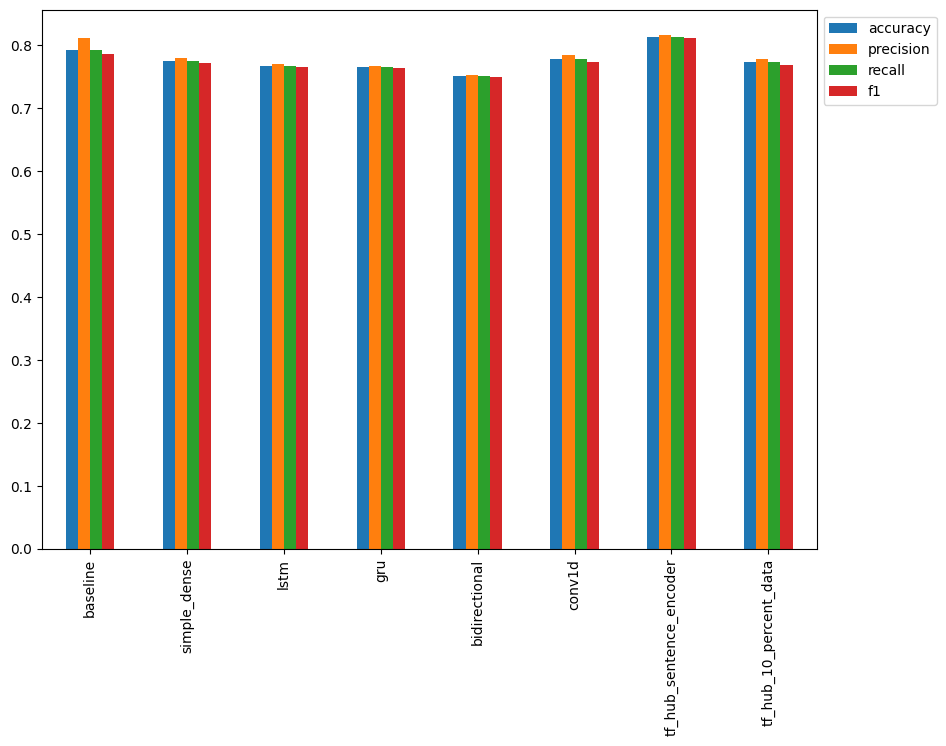

In [104]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

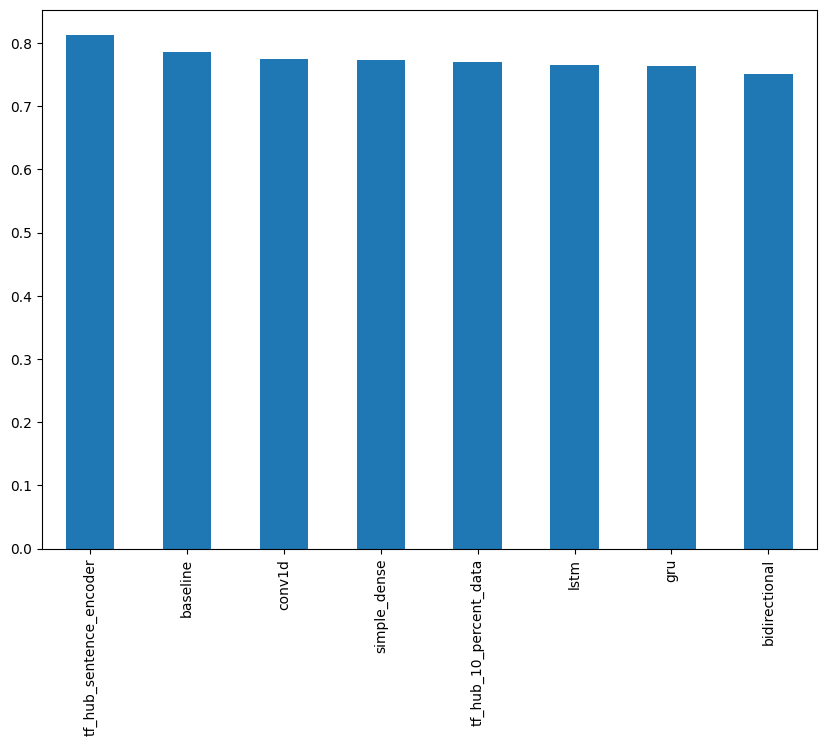

In [105]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Combining models (model ensembling/stacking)

**The idea behind model stacking is that if several uncorrelated models agree on a prediction, then the prediction must be more robust than a prediction made by a singular model.**

* `Averaging` - Take the output prediction probabilities of each model for each sample, combine them and then average them.
* `Majority vote (mode)` - Make class predictions with each of your models on all samples, the predicted class is the one in majority. For example, if three different models predict [1, 0, 1] respectively, the majority class is 1, therefore, that would be the predicted label.
* `Model stacking` - Take the outputs of each of your chosen models and use them as inputs to another model.